## Gini index on 80-20 split :

In [4]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree

In [5]:
# Load data
df = pd.read_csv("HousePricing.csv")
print(df.head())   # get the first 5 rows

       area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  0.686780       4.0        2.0      3.0         1          0         0   
1  0.843390       4.0        3.5      3.5         1          0         0   
2  0.945085       3.0        2.0      2.0         1          0         1   
3  0.694915       4.0        2.0      2.0         1          0         1   
4  0.686780       4.0        1.0      2.0         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  \
0                0                1      2.0         1                 3   
1                0                1      2.5         0                 3   
2                0                0      2.0         1                 2   
3                0                1      2.5         1                 3   
4                0                1      2.0         0                 3   

   price  
0      1  
1      1  
2      1  
3      1  
4      1  


In [6]:
# split dataset in features and target variable
fn = [str(f) for f in df.keys().tolist()[:-1]]  # df columns names without last column 'price'
X = df[fn]   # Features names
y = df['price']   # Target variable


In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  # 80% training and 20% test


In [8]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)


In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8256880733944955


[[50  4]
 [15 40]]


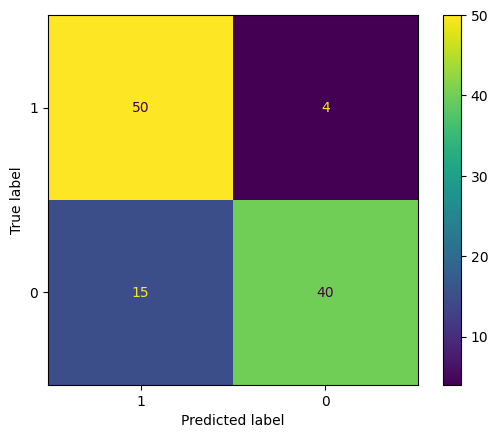

In [10]:
# compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

cn = df['price'].astype(str).unique()   # classes names

# create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)


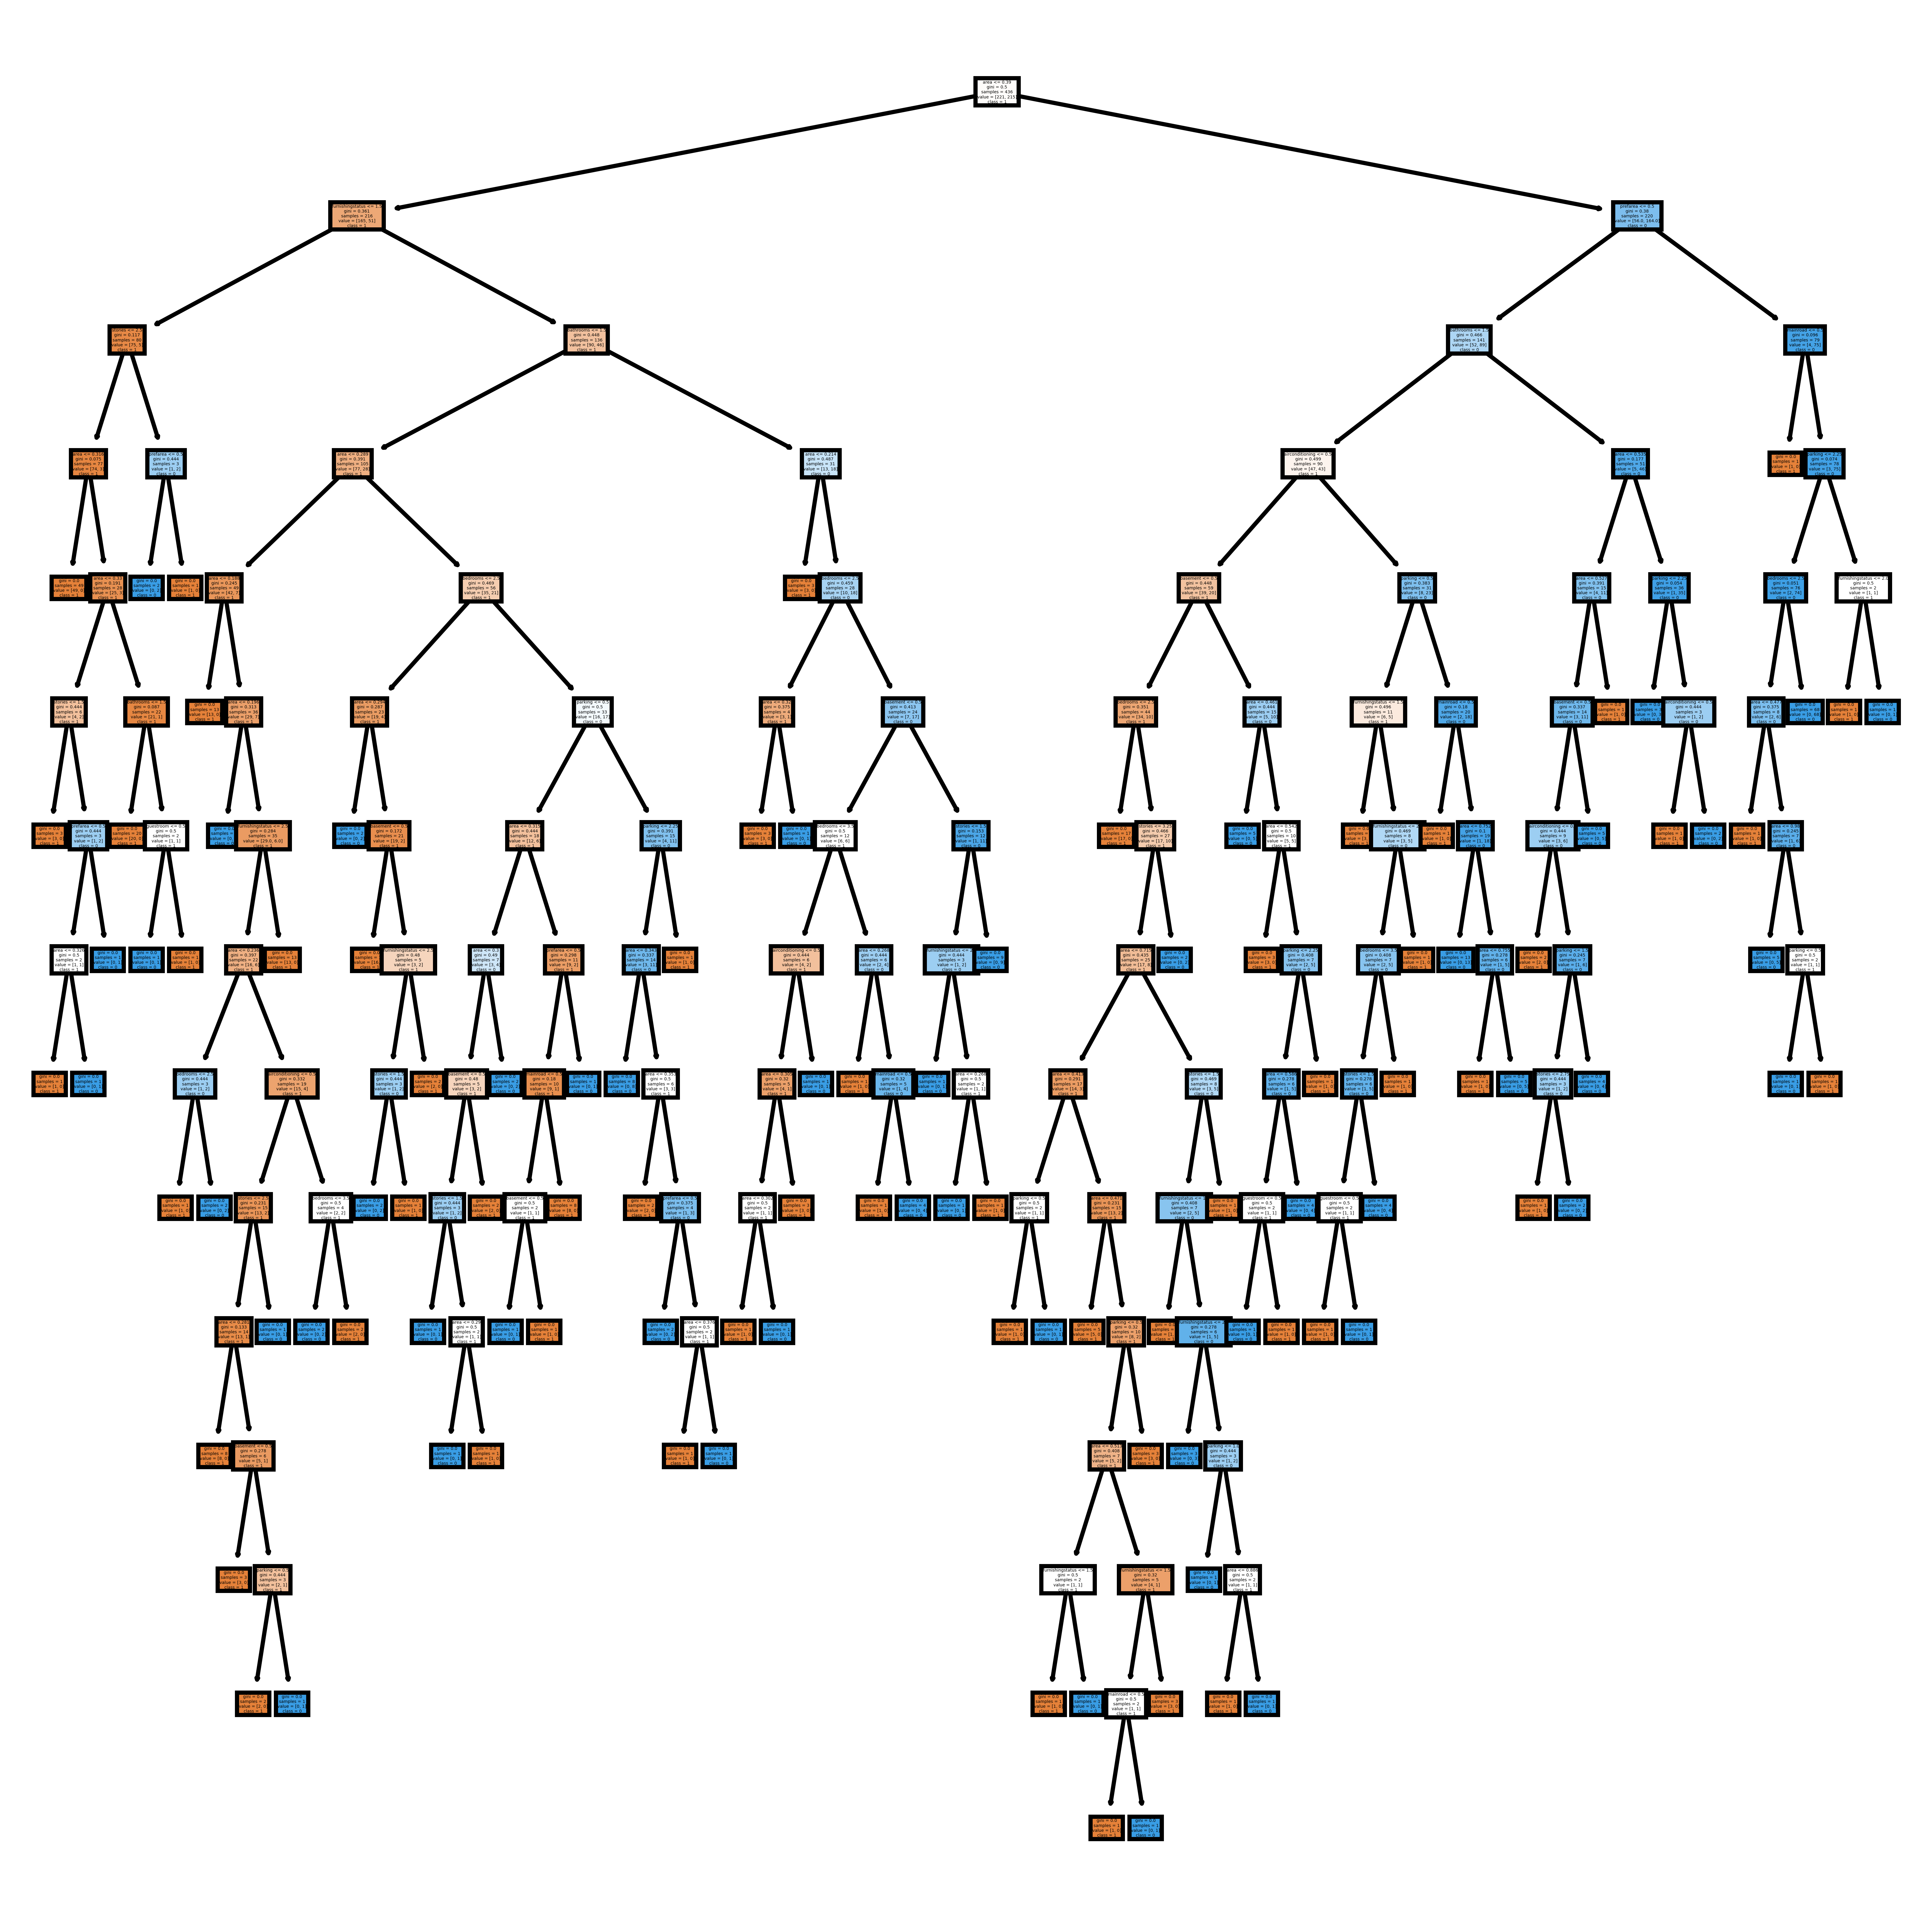

In [13]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), dpi=1000)

tree.plot_tree(clf,
               feature_names=fn,  
               class_names=cn,    
               filled=True)


import os

# Create directory if it does not exist
if not os.path.exists("plots"):
    os.makedirs("plots")

fig.savefig("plots/HousePricing_DT.jpg")


In [14]:
importances = clf.feature_importances_
feature_names = X.columns
feature_importances = dict(zip(feature_names, importances))
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


area: 0.4484358596716739
bathrooms: 0.07956861949418624
furnishingstatus: 0.0779785759692414
prefarea: 0.06372755598470846
parking: 0.06264279196078949
bedrooms: 0.06214065774305814
airconditioning: 0.05567248119721469
stories: 0.05501228254443027
basement: 0.04925764258695697
mainroad: 0.03179945834495192
guestroom: 0.013764074502788595
hotwaterheating: 0.0


### Model Analysis:

#### 1.Performance:
The Decision Tree classifier achieved an accuracy score of approximately 0.8256 or 82.56% on the test set, indicating that the model correctly classified 82.56% of the samples. This level of accuracy suggests that the Decision Tree is reasonably effective in distinguishing between the two classes (price increase or not).



#### 2.Confusion Matrix Analysis:

* ##### The confusion matrix shows the following results:
    * True Positive (TP): 50 instances where the model correctly predicted class 1.
    * True Negative (TN): 40 instances where the model correctly predicted class 0.
    * False Positive (FP): 4 instances where the model incorrectly predicted class 1 when it was actually 0.
    * False Negative (FN): 15 instances where the model incorrectly predicted class 0 when it was actually 1.

<br>

* ##### From this matrix, we can calculate additional metrics:

     * ##### Accuracy:
        * Accuracy = (TP + TN) / (TP + TN + FP + FN)
        * Accuracy = (50 + 40) / (50 + 40 + 4 + 15) ≈ 0.8256 or 82.56%


     * ##### Precision (Positive Predictive Value):
        * Precision = TP / (TP + FP)
        * Precision = 50 / (50 + 4) ≈ 0.9259 or 92.59%


     * ##### Recall (Sensitivity or True Positive Rate):
        * Recall = TP / (TP + FN)
        * Recall = 50 / (50 + 15) ≈ 0.7692 or 76.92%

    
     * ##### Specificity (True Negative Rate):
        * Specificity = TN / (TN + FP)
        * Specificity = 40 / (40 + 4) ≈ 0.9091 or 90.91%
          

     * ##### Error Rate:
        * Error Rate = (FP + FN) / (TP + TN + FP + FN)
        * Error Rate = (4 + 15) / (50 + 40 + 4 + 15) = 0.1744 or 17.44%

<br>

*   These values indicate that the model has a relatively high accuracy (82.56%) and precision (92.59%), meaning it is effective at correctly identifying instances of class 1 without too many false positives. The specificity (90.91%) also shows that it performs well in correctly identifying class 0. However, the model’s recall (76.92%) for class 1 is somewhat lower, suggesting that it misses a notable portion of actual class 1 instances. The error rate of 17.44% highlights the proportion of instances the model misclassified, indicating potential areas for improvement.

#### 3.Feature Importance:
* Based on the feature importance values, we can identify which features played a more significant role in the model's decisions:
    * **area**: The most important feature, contributing 44.84%, indicating that area is the primary factor the model relies on to predict price increase.
    * **bathrooms and furnishingstatus**: These features have moderate importance, with contributions of 7.96% and 7.80%, respectively, suggesting that the number of bathrooms and furnishing status also impact the model’s decision.
    * **prefarea, parking, and bedrooms**: These come next, with contributions between 6.37% and 6.21%, meaning they play a notable but lesser role.
    * **airconditioning, stories, and basement**: These features have lower importance, with contributions between 5.5% and 4.9%, but still add value to the model.
    * **mainroad and guestroom**: These have limited impact, with contributions of 3.18% and 1.38%, respectively.
    * **hotwaterheating**: This feature had no impact on the model’s decision-making, indicating it was not useful for prediction.

#### 4.Tree Depth and Splitting Criteria:
The Decision Tree visualization reveals a complex structure with multiple levels of splits. The depth and branching structure of the tree indicate the model's attempt to capture nuances in the data. The top nodes include highly important features, such as area and furnishingstatus, which the model uses for impactful splits, reflecting their influence on price change predictions.

#### 5.Model Visualization:
The plotted tree shows detailed branching with color-coded nodes, illustrating how the model partitions the data. This visualization helps in understanding how specific features guide the model’s decisions to classify instances as 0 (no price increase) or 1 (price increase). The filled nodes represent the majority class within each node, providing an intuitive way to see how the model makes its classifications at each level.

#### 6.Conclusion:
The model demonstrates good performance with a high level of accuracy and precision. However, the slightly lower recall for class 1 suggests that it may not be identifying all instances of price increases effectively. The error rate further indicates areas where the model could potentially improve.

 ## IG on 80-20 split :

In [15]:
# Load data
df = pd.read_csv("HousePricing.csv")
print(df.head())   # get the first 5 rows

       area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  0.686780       4.0        2.0      3.0         1          0         0   
1  0.843390       4.0        3.5      3.5         1          0         0   
2  0.945085       3.0        2.0      2.0         1          0         1   
3  0.694915       4.0        2.0      2.0         1          0         1   
4  0.686780       4.0        1.0      2.0         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  \
0                0                1      2.0         1                 3   
1                0                1      2.5         0                 3   
2                0                0      2.0         1                 2   
3                0                1      2.5         1                 3   
4                0                1      2.0         0                 3   

   price  
0      1  
1      1  
2      1  
3      1  
4      1  


In [16]:
# split dataset in features and target variable
fn = [str(f) for f in df.keys().tolist()[:-1]]  # df columns names without last column 'price'
X = df[fn]   # Features names
y = df['price']   # Target variable

In [17]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  # 80% training and 20% test


In [18]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion='entropy')


# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)


In [19]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7889908256880734


[[48  6]
 [17 38]]


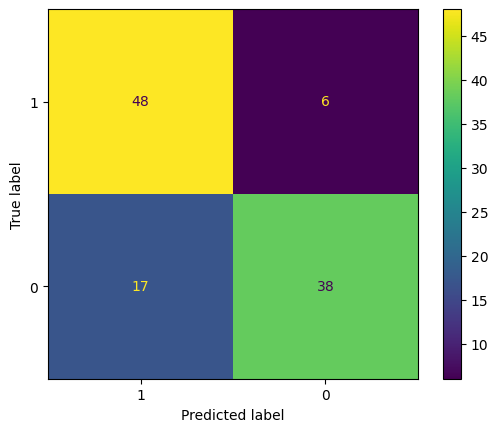

In [20]:
# compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

cn = df['price'].astype(str).unique()   # classes names

# create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)


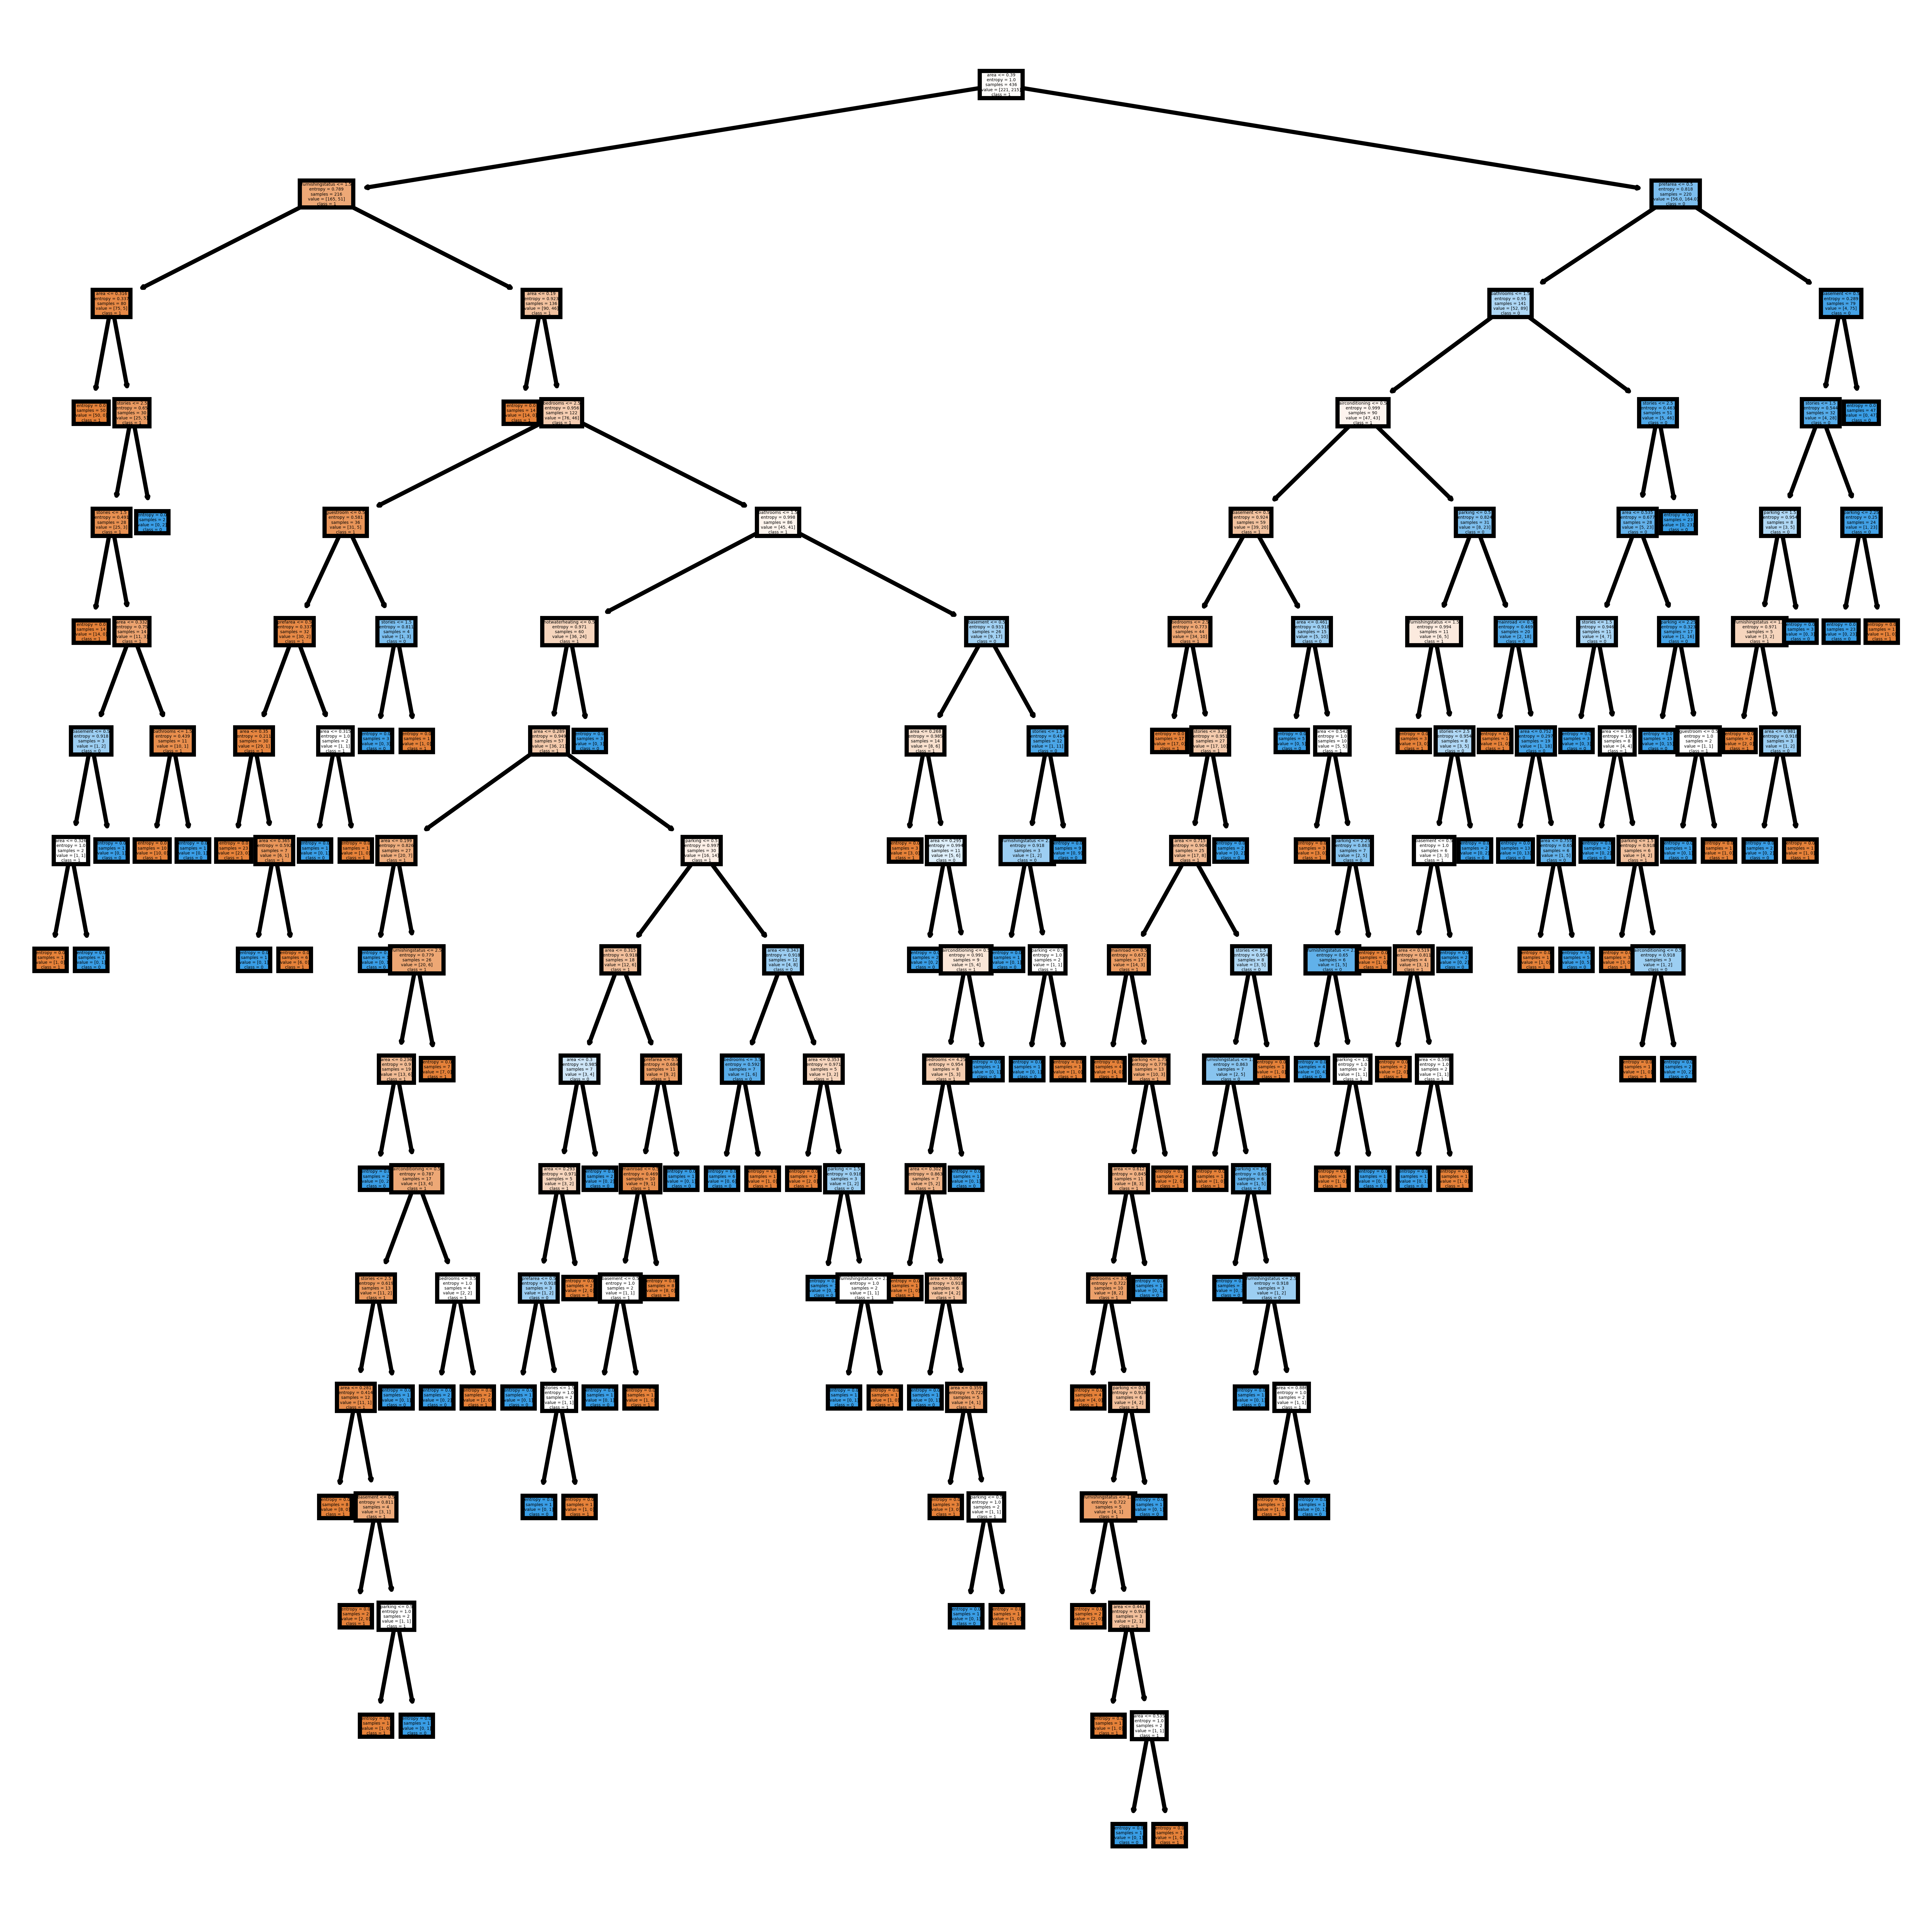

In [23]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), dpi=1000)

tree.plot_tree(clf,
               feature_names=fn,  
               class_names=cn,    
               filled=True)


import os

# Create directory if it does not exist
if not os.path.exists("plots"):
    os.makedirs("plots")

fig.savefig("plots/HousePricing_DT_Entropy.jpg")

In [24]:
importances = clf.feature_importances_
feature_names = X.columns
feature_importances = dict(zip(feature_names, importances))
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

area: 0.4110671848672025
parking: 0.08572984551961922
stories: 0.08407895777517185
furnishingstatus: 0.07974571453618164
bedrooms: 0.06794803626723543
prefarea: 0.06733769167275792
bathrooms: 0.06581086902849147
basement: 0.05584392752665624
airconditioning: 0.03485602212644558
guestroom: 0.020390811599519117
mainroad: 0.017698195494805405
hotwaterheating: 0.00949274358591355


### Model Analysis:
#### 1. Performance:
The Decision Tree classifier achieved an accuracy score of approximately 0.7899 or 78.99% on the test set, indicating that the model correctly classified 78.99% of the samples. This level of accuracy suggests that the Decision Tree is reasonably effective in distinguishing between the two classes (price increase or not), but there is room for improvement.

#### 2. Confusion Matrix Analysis:
* ##### The confusion matrix shows the following results:
    * True Positive (TP): 48 instances where the model correctly predicted class 1.
    * True Negative (TN): 38 instances where the model correctly predicted class 0.
    * False Positive (FP): 6 instances where the model incorrectly predicted class 1 when it was actually 0.
    * False Negative (FN): 17 instances where the model incorrectly predicted class 0 when it was actually 1.

<br>

* ##### From this matrix, we can calculate additional metrics:


    * ##### Accuracy:
        * Accuracy = (TP + TN) / (TP + TN + FP + FN)
        * Accuracy = (48 + 38) / (48 + 38 + 6 + 17) ≈ 0.7899 or 78.99%



    * ##### Precision (Positive Predictive Value):
        * Precision = TP / (TP + FP)
        * Precision = 48 / (48 + 6) ≈ 0.8889 or 88.89%



    * ##### Recall (Sensitivity or True Positive Rate):
        * Recall = TP / (TP + FN)
        * Recall = 48 / (48 + 17) ≈ 0.7385 or 73.85%



    * ##### Specificity (True Negative Rate):
        * Specificity = TN / (TN + FP)
        * Specificity = 38 / (38 + 6) ≈ 0.8636 or 86.36%



    * ##### Error Rate:
        * Error Rate = (FP + FN) / (TP + TN + FP + FN)
        * Error Rate = (6 + 17) / (48 + 38 + 6 + 17) ≈ 0.2101 or 21.01%

<br>

* These values indicate that the model has a relatively high precision (88.89%) and specificity (86.36%), meaning it is effective at correctly identifying instances of class 1 without too many false positives. The accuracy (78.99%) shows moderate overall performance, but the model’s recall (73.85%) for class 1 is somewhat lower, suggesting that it misses a notable portion of actual class 1 instances. The error rate of 21.01% highlights areas for potential improvement.
#### 3. Feature Importance:
* Based on the feature importance values, we can identify which features played a more significant role in the model's decisions:
    * **area**: The most important feature, contributing 41.1%, indicating that area is the primary factor the model relies on to predict price increase.
    * **parking and stories**: These features have moderate importance, with contributions of 8.57% and 8.40%, respectively, suggesting they also impact the model’s decision.
    * **furnishingstatus, bedrooms, and prefarea**: These come next, with contributions between 7.97% and 6.79%, meaning they play a notable but lesser role.
    * **basement, bathrooms, and airconditioning**: These features have lower importance, with contributions between 5.5% and 3.8%.
    * **mainroad and guestroom**: These have limited impact, with contributions of 1.76% and 0.82%, respectively.
    * **hotwaterheating**: This feature had almost no impact on the model’s decision-making, indicating it was not useful for prediction.
#### 4. Tree Depth and Splitting Criteria:
The Decision Tree visualization reveals a complex structure with multiple levels of splits. The depth and branching structure of the tree indicate the model's attempt to capture nuances in the data. The top nodes include highly important features, such as area and parking, which the model uses for impactful splits, reflecting their influence on price change predictions.

#### 5. Model Visualization:
The plotted tree shows detailed branching with color-coded nodes, illustrating how the model partitions the data. This visualization helps in understanding how specific features guide the model’s decisions to classify instances as 0 (no price increase) or 1 (price increase). The filled nodes represent the majority class within each node, providing an intuitive way to see how the model makes its classifications at each level.

#### 6. Conclusion:
The model demonstrates moderate performance with a high level of precision and specificity. However, the slightly lower recall for class 1 suggests that it may not be identifying all instances of price increases effectively. The error rate further indicates areas where the model could potentially improve.